In [ ]:
#new code
#Detecting if email is phishing or not.
import pandas as pd
#Import pandas in order to create the data frame from our dictionary.
import nltk
from nltk.corpus import stopwords
#A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore.
import string
#Import string library function used to eliminate punctuation from setnetnces
#in order to tokenize each line of the data.
#Load the files & creating CSV
import glob
from pathlib import Path
from google.colab import drive
#Used the drive directory to open files and insert them to our CSV.
import re
from google.colab import files
#used only to download the CSV file once.
import os
import numpy as np
import email
from email.message import EmailMessage


drive.mount('/content/gdrive' , force_remount=True)

#path to legitimate emails folder to load into CSV file
path_legit = '/content/gdrive/MyDrive/פרויקט גמר- amit dvir/rakesh DS/IWSPA2.0_Training_Full_Header/legit' 
path_phish = '/content/gdrive/MyDrive/פרויקט גמר- amit dvir/rakesh DS/IWSPA2.0_Training_Full_Header/phish'

#data_legit is a dictionary contaning two columns.
#each mail will be inserted into the text column.
data_legit = {'Received':[], 'Delivered-To':[], 'From':[], 'CC':[], 'Subject':[] , 'Date':[] ,'X-Mailer':[], 'Message_Content':[], 'Number_Of_Links':[], 'Phish':[]} # features

#add more headers! (Baracuda)
headers= ['Received:', 'X-Forefront-Antispam-Report:', 'X-SpamScore:', 'X-BigFish:', 'Received-SPF:', 'DKIM-Signature:', 'Date:', 'From:', 'To:', 'Message-ID:', 'Subject:', 'X-TM-ID:', 'X-Info:', 'X-Mailer:', 'X-IADB-IP:', 'X-JMailer:', 'X-Enigmail-Version:', 'X-IADB-IP-REVERSE:', 'X-IADB-URL:', 'X-Unsubscribe-Web:', 'List-Unsubscribe:', 'X-rpcampaign:', 'Return-Path:', 'MIME-Version:', 'Content-Type:', 'X-Original-To:', 'Delivered-To:', 'Thread-Topic:', 'Thread-Index:', 'Accept-Language:', 'Content-Language:', 'X-MS-Has-Attach:', 'X-MS-TNEF-Correlator:', 'x-originating-ip:', 'X-BeenThere:', 'X-Mailman-Version:', 'Precedence:', 'Reply-To:', 'Sender:', 'Errors-To:', 'X-MS-Exchange-Organization-AuthSource:', 'X-MS-Exchange-Organization-AuthAs:', 'CC:', 'X-Universally-Unique-Identifier:', 'X-AMAZON-MAIL-RELAY-TYPE:', 'X-AMAZON-RTE-VERSION:', 'X-Original-MessageID:', 'X-SES-Outgoing:', 'X-ASG-Orig-Subj:', 'X-MarketoID:Status:', 'X-MS-Exchange-Organization-AuthMechanism:', 'References:', 'In-Reply-To:', 'A:', 'X-Report-Abuse:', 'X-Binding:', 'X-TokenInfo-NoToken:', 'Feedback-ID:', 'x-jobid:', 'X-Campaign:', 'X-campaignid:', 'X-MC-User:', 'List-ID:', 'X-Accounttype:', 'X-blue_mailer-http_host:', 'X-blue_mailer-history_ids:', 'X-OriginalArrivalTime:', 'X-PMX-Version:', 'X-PerlMx-Spam:', 'X-maillist-id:', 'X-Barracuda-Connect:', 'X-Barracuda-Start-Time:', 'X-Barracuda-URL:', 'X-Virus-Scanned:', 'X-Barracuda-BRTS-Status:', 'X-Barracuda-Spam-Score:', 'X-Barracuda-Spam-Status:', 'X-Barracuda-Spam-Report:', 'X-MS-Exchange-Organization-SCL:', 'X-FFO-Routing-Override:', 'X-MSFBL:', 'X-Smtp-Server:', 'X-Auto-Response-Suppress:', 'X-Originating-IP:', 'X-libpst-forensic-sender:', 'X-OlkEid:', 'X-Note-AR-ScanTimeLocal:', 'X-Policy:', 'X-Primary:', 'X-Note:', 'X-ALLOW:', 'X-Virus-Scan:', 'X-Country-Path:', 'X-Note-Sending-IP:', 'X-Note-Reverse-DNS:', 'X-Note-Return-Path:', 'X-MS-Exchange-Organization-AVStamp-Mailbox:', 'X-Apple-Auto-Saved:', 'X-Apple-Mail-Remote-Attachments:', 'X-Apple-Base-Url:', 'X-Apple-Windows-Friendly:', 'X-Apple-Mail-Signature:', 'X-Uniform-Type-Identifier:', 'X-maillist-guid:', 'X-WatchGuard-AntiVirus:', 'X-Note-SnifferID:', 'X-GBUdb-Analysis:', 'X-Signature-Violations:', 'X-Note-419:', 'X-Warn:', 'X-Report-Abuse-To:', 'x-job:', 'X-SG-EID:', 'X-SG-ID:', 'X-Google-DKIM-Signature:', 'X-Gm-Message-State:', 'X-Received:', 'x-ms-exchange-organization-authsource:', 'x-ms-exchange-organization-authas:', 'x-ms-exchange-organization-authmechanism:', 'x-forefront-antispam-report:', 'x-eopattributedmessage:', 'x-microsoft-antispam:', 'x-domain.com:', 'x-received:', 'x-ms-office365-filtering-correlation-id:', 'x-microsoft-exchange-diagnostics:', 'x-microsoft-antispam-prvs:', 'x-exchange-antispam-report-test:', 'x-exchange-antispam-report-cfa-test:', 'x-forefront-prvs:', 'X-MS-Exchange-CrossTenant-originalarrivaltime:', 'X-MS-Exchange-CrossTenant-fromentityheader:', 'X-MS-Exchange-CrossTenant-id:', 'X-MS-Exchange-Transport-CrossTenantHeadersStamped:', 'X-Original-Sender:', 'X-Original-Authentication-Results:', 'X-Spam-Checked-In-Group:', 'X-Google-Group-Id:', 'X-MarketoID:', 'X-MktArchive:', 'X-MailFrom:', 'X-MSYS-API:', 'X-MktMailDKIM:', 'X-Feedback-ID:', 'x-mcda:', 'X-Proofpoint-Virus-Version:', 'X-CFilter-Loop:', 'X-rim-org-msg-ref-id:', 'X-Priority:', 'X-MimeOLE:', 'x-ld-processed:', 'x-info:', 'x-iadb-ip-reverse:', 'x-rpcampaign:', 'x-iadb-url:', 'x-tm-id:', 'x-iadb-ip:', 'x-unsubscribe-web:', 'X-Yahoo-Newman-Id:', 'X-Yahoo-Newman-Property:', 'X-YMail-OSG:', 'X-Yahoo-SMTP:', 'X-DynectEmail-Msg-Key:', 'X-Profile:', 'X-Code:', 'X-Tag:', 'X-DynectEmail-Msg-Hash:', 'X-DynectEmail-X-Headers:', 'X-IronPort-Anti-Spam-Filtered:', 'X-IronPort-Anti-Spam-Result:', 'X-IPAS-Result:', 'X-IronPort-AV:', 'X-Note-AR-Scan:', 'X-ASG-Debug-ID:', 'X-Barracuda-Envelope-From:', 'X-Barracuda-Apparent-Source-IP:', 'X-CMAE-Score:', 'X-CMAE-Analysis:', 'X-Message-Flag:', 'X-Delay:', 'X-Forefront-Antispam-Report-Untrusted:', 'X-OriginatorOrg:', 'X-DKIM:', 'x-ms-exchange-transport-fromentityheader:', 'X-sgxh1:', 'X-rext:', 'X-cid:', 'x-csa-complaints:', 'x-emarsys-identify:', 'x-emarsys-environment:', 'X-List-Unsubscribe:', 'X-ICPINFO:', 'X-Return-Path-Hint:', 'X-AuditID:', 'X-Brightmail-Tracker:', 'X-CallingTelephoneNumber:', 'X-VoiceMessageSenderName:', 'X-CallID:', 'X-campaignID:', 'x-pviq:', 'X-Proofpoint-Spam-Details:', 'X-Facebook:', 'X-Facebook-Notify:', 'X-FACEBOOK-PRIORITY:', 'X-Campaign-Activity-ID:', 'X-Channel-ID:', 'X-Roving-Campaignid:', 'X-Roving-Id:', 'X-CTCT-ID:', 'x-sg-eid:', 'x-accounttype:', 'X-Rocket-MIMEInfo:', 'X-valueof-DROP_DATE:', 'X-valueof-CAMPAIGN_CODE:', 'X-valueof-CELL_CODE:', 'X-valueof-ONEPASS_NUMBER:', 'X-Apple-Encoding-Hint:', 'X-MS-Exchange-Inbox-Rules-Loop:', 'x-ms-exchange-parent-message-id:', 'x-ms-exchange-generated-message-source:', 'x-workshareprotect-dsp:', 'x-tm-as-product-ver:', 'x-tm-as-result:', 'x-tm-as-user-approved-sender:', 'x-tm-as-user-blocked-sender:', 'X-PHP-Originating-Script:', 'X-FBL:', 'X-Antivirus:', 'X-Antivirus-Status:', 'X-EOPAttributedMessage:', 'X-Microsoft-Antispam:', 'X-MIMETrack:', 'X-CT-Score:', 'X-Authority-Analysis:', 'X-CM-Score:', 'X-Bps1:', 'X-FB-DOMAIN-IP-MATCH:', 'X-DMHA-ID-Packet:', 'X-Env-Sender:', 'X-Msg-Ref:', 'X-StarScan-Received:', 'X-StarScan-Version:', 'X-VirusChecked:', 'X-Barracuda-BRL-Tag:', 'X-ASG-Tag:', 'X-Barracuda-Spam-Flag:', 'X-Nat-Received:', 'X-Mailman-Approved-At:', 'X-ELNK-Trace:', 'X-OutGoing-Spam-Status:', 'X-AntiAbuse:', 'X-Get-Message-Sender-Via:', 'X-Authenticated-Sender:', 'X-Source:', 'X-Source-Args:', 'X-Source-Dir:', 'X-Microsoft-Exchange-Diagnostics:', 'X-MS-Office365-Filtering-Correlation-Id:', 'X-Microsoft-Antispam-PRVS:', 'X-Exchange-Antispam-Report-Test:', 'X-Exchange-Antispam-Report-CFA-Test:', 'X-Forefront-PRVS:', 'X-MS-Exchange-CrossTenant-OriginalArrivalTime:', 'X-MS-Exchange-CrossTenant-Id:', 'X-MS-Exchange-CrossTenant-OriginalAttributedTenantConnectingIp:', 'X-MS-Exchange-CrossTenant-FromEntityHeader:', 'X-MC-Unique:', 'x-icloud-spam-score:', 'X-MANTSH:', 'X-TCPREMOTEIP:', 'X-Authenticated-UID:', 'x-dkim_sign_required:', 'x-sent-to:', 'x-emailtype-id:', 'x-exclaimer-md-config:', 'X-Sender-Id:', 'X-eBay-MailTracker:', 'X-eBay-MailVersionTracker:', 'X-Mlf-Version:', 'X-Mlf-UniqueId:', 'x-client-id:', 'X-RR-Connecting-IP:', 'X-Cloudmark-Score:', 'X-Barracuda-BBL-IP:', 'X-Barracuda-RBL-IP:', 'X-Company_ID:', 'X-vrfbldomain:', 'X-vrpod:', 'X-CTS-Enabled:', 'X-vrrpmm:', 'X-Mailer-Reference:', 'X-Message-Reference:', 'X-RPCampaign:', 'X-MSMail-Priority:', 'x-ms-exchange-messagesentrepresentingtype:', 'X-VirtualServer:', 'X-VirtualServerGroup:', 'X-MailingID:', 'X-SMHeaderMap:', 'X-Destination-ID:', 'X-SMFBL:', 'X-ReportingKey:', 'X-UserID:', 'X-VConfig:', 'X-EXCLAIMER-MD-CONFIG:', 'X-Test-Mailing:', 'X-Mail-From:', 'X-Match:', 'X-RCPT-To:', 'X-Complaints-To:', 'x-spam-cmae:', 'x-spam-account:', 'x-spam-domain:', 'X-MB-Message-Source:', 'X-MB-Message-Type:', 'x-aol-global-disposition:', 'x-aol-sid:', 'X-DistributionId:', 'X-AccessCode:', 'X-Barracuda-BRTS-Evidence:', 'x-virtualserver:', 'x-virtualservergroup:', 'x-smfbl:', 'x-smheadermap:', 'x-destination-id:', 'x-mailingid:', 'x-xsmessageid:', 'x-xsmailingid:', 'X-Signature:', 'X-AOL-IP:', 'x-Proofpoint-Spam-Details:', 'X-SendGrid-Contentd-ID:', 'X-Message-Tracking-Id:', 'x-subscriber:', 'X-Accountcode:', 'X-Footer:', 'X-User-Agent:', 'x-forefront-antispam-report-untrusted:', 'X-SMTPAPI:', 'X-libpst-forensic-bcc:', 'X-SMTPDoctor-Processed:', 'X-HubSpot-MID:', 'X-SFDC-LK:', 'X-SFDC-User:', 'X-Sender:', 'X-mail_abuse_inquiries:', 'X-SFDC-TLS-NoRelay:', 'X-SFDC-EmailCategory:', 'X-SFDC-EntityId:', 'X-SFDC-Binding:', 'X-SFDC-Interface:', 'X-AOL-VSS-INFO:', 'X-AOL-VSS-CODE:', 'X-TM-IMSS-Message-ID:', 'x-mcafeedlp-tag-0:', 'x-mcafeedlp-tagged:', 'X-KeepSent:', 'X-EmailType-Id:', 'X-Sent-To:', 'X-Reference:', 'X-Request-UUID:', 'X-Business-Group:', 'X-Attach-Flag:', 'X-TXN_ID:', 'X-DKIM_SIGN_REQUIRED:', 'x-mid:', 'x-orgId:', 'X-RSA-Inspected:', 'X-RSA-Classifications:', 'X-RSA-Action:', 'X-Barracuda-Virus-Scanned:', 'X-Forwarded-Message-Id:', 'X-TM-AS-MML:', 'X-libpst-forensic-sender', 'X-Forefront-Antispam-Report', 'X-SpamScore', 'X-BigFish', 'X-FFO-Routing-Override', 'X-TM-ID', 'X-Info', 'X-Mailer', 'X-IADB-IP', 'X-IADB-IP-REVERSE', 'X-IADB-URL', 'X-Unsubscribe-Web', 'X-rpcampaign', 'X-Original-To', 'X-MS-Has-Attach', 'X-MS-TNEF-Correlator', 'x-originating-ip', 'X-BeenThere', 'X-Mailman-Version', 'X-MS-Exchange-Organization-AuthSource', 'X-MS-Exchange-Organization-AuthAs', 'X-MS-Exchange-Organization-AuthMechanism', 'X-Auto-Response-Suppress', 'X-MS-Exchange-Organization-SCL', 'X-sgxh1', 'X-rext', 'X-cid', 'X-Originating-IP', 'X-Note-AR-ScanTimeLocal', 'X-Policy', 'X-Primary', 'X-Note', 'X-ALLOW', 'X-Virus-Scan', 'X-Country-Path', 'X-Note-Sending-IP', 'X-Note-Reverse-DNS', 'X-Note-Return-Path', 'X-Campaign', 'X-campaignid', 'X-Report-Abuse', 'X-MC-User', 'X-Feedback-ID', 'X-Accounttype', 'x-mcda', 'X-WatchGuard-AntiVirus', 'X-MS-Exchange-Organization-AVStamp-Mailbox', 'X-Note-SnifferID', 'X-GBUdb-Analysis', 'X-Signature-Violations', 'X-Note-419', 'X-Warn', 'X-maillist-id', 'X-maillist-guid', 'X-FB-DOMAIN-IP-MATCH', 'X-AMAZON-MAIL-RELAY-TYPE', 'X-AMAZON-RTE-VERSION', 'X-Original-MessageID', 'X-SES-Outgoing', 'X-blue_mailer-http_host', 'X-blue_mailer-history_ids', 'X-Smtp-Server', 'X-Universally-Unique-Identifier', 'X-DKIM', 'X-Google-DKIM-Signature', 'X-Gm-Message-State', 'X-Received', 'x-job', 'X-OlkEid', 'X-JMailer', 'X-EOPAttributedMessage', 'X-Microsoft-Antispam', 'x-ms-exchange-organization-authas', 'x-ms-exchange-organization-authmechanism', 'x-ms-exchange-organization-authsource', 'x-forefront-antispam-report', 'x-microsoft-antispam', 'x-eopattributedmessage', 'x-domain.com', 'x-rpcampaign', 'x-info', 'x-iadb-ip-reverse', 'x-iadb-url', 'x-tm-id', 'x-iadb-ip', 'x-unsubscribe-web', 'X-Original-Sender', 'X-Original-Authentication-Results', 'X-Spam-Checked-In-Group', 'X-Google-Group-Id', 'X-PMX-Version', 'x-exchange-antispam-report-test', 'X-DMHA-ID-Packet', 'x-ms-exchange-transport-fromentityheader', 'X-HubSpot-MID', 'X-SG-EID', 'X-SG-ID', 'X-MimeOLE', 'X-MSFBL', 'X-Priority', 'X-MIMETrack', 'X-Note-AR-Scan', 'x-received', 'X-ASG-Debug-ID', 'X-Barracuda-Envelope-From', 'X-Barracuda-Apparent-Source-IP', 'X-TM-IMSS-Message-ID', 'X-ASG-Orig-Subj', 'x-mcafeedlp-tag-0', 'x-mcafeedlp-tagged', 'X-Barracuda-Connect', 'X-Barracuda-Start-Time', 'X-Barracuda-URL', 'X-Barracuda-BRTS-Status', 'X-Virus-Scanned', 'X-Barracuda-Spam-Score', 'X-Barracuda-Spam-Status', 'X-CallingTelephoneNumber', 'X-VoiceMessageSenderName', 'X-CallID', 'X-Proofpoint-Virus-Version', 'X-Proofpoint-Spam-Details', 'x-exclaimer-md-config', 'X-Exchange-Antispam-Report-Test', 'X-KeepSent', 'X-SMTPAPI', 'X-Exchange-Antispam-Report-CFA-Test', 'X-Message-Flag', 'X-List-Unsubscribe', 'X-ICPINFO', 'X-Return-Path-Hint', 'x-ms-office365-filtering-correlation-id', 'x-microsoft-exchange-diagnostics', 'x-ld-processed', 'x-microsoft-antispam-prvs', 'x-exchange-antispam-report-cfa-test', 'x-forefront-prvs', 'X-MS-Exchange-CrossTenant-originalarrivaltime', 'X-MS-Exchange-CrossTenant-fromentityheader', 'X-MS-Exchange-CrossTenant-id', 'X-MS-Exchange-Transport-CrossTenantHeadersStamped', 'X-MB-Message-Source', 'X-MB-Message-Type', 'x-aol-global-disposition', 'x-aol-sid', 'X-PHP-Originating-Script', 'X-EXCLAIMER-MD-CONFIG', 'X-valueof-DROP_DATE', 'X-valueof-CAMPAIGN_CODE', 'X-valueof-CELL_CODE', 'X-valueof-ONEPASS_NUMBER', 'X-Enigmail-Version', 'X-Antivirus', 'X-Antivirus-Status', 'X-Apple-Auto-Saved', 'X-Apple-Mail-Remote-Attachments', 'X-Apple-Base-Url', 'X-Apple-Windows-Friendly', 'X-Apple-Mail-Signature', 'X-Uniform-Type-Identifier', 'X-Campaign-Activity-ID', 'X-Channel-ID', 'X-Roving-Campaignid', 'X-Roving-Id', 'X-CTCT-ID', 'x-csa-complaints', 'x-emarsys-identify', 'x-emarsys-environment', 'X-CMAE-Score', 'X-CMAE-Analysis', 'X-Barracuda-Spam-Report', 'X-CFilter-Loop', 'X-CS-IP', 'X-Status', 'X-Keywords', 'X-UID', 'X-MSMail-Priority', 'X-OriginalArrivalTime', 'X-EN-OrigOutIP', 'X-EN-IMPSID', 'X-EN-Info', 'X-EN-CGIUser', 'X-EN-CGIPath', 'X-EN-OrigIP', 'X-EN-Timestamp', 'X-Identity-Key', 'X-Accept-Language', 'X-DSPAM-Factors', 'X-DSPAM-Result', 'X-DSPAM-Confidence', 'X-DSPAM-Probability', 'X-DSPAM-Signature', 'X-Spam-Flag', 'X-Spam-Score', 'X-Spam-Level', 'X-Spam-Status', 'X-Greylist', 'X-Sender', 'X-MPS-Timestamp', 'X-MPS-Clientip', 'X-Message-Info', 'X-CNFS-Analysis', 'X-Scanned-by', 'X-AntiAbuse', 'X-Source', 'X-Source-Args', 'X-Source-Dir', 'X-IronPort-Anti-Spam-Filtered', 'X-IronPort-Anti-Spam-Result', 'X-PerlMx-Spam', 'X-Quarantine-ID', 'X-INP-MailScanner-Information', 'X-INP-MailScanner-ID', 'X-INP-MailScanner', 'X-INP-MailScanner-From', 'X-esp', 'X-TM-AS-Product-Ver', 'X-TM-AS-Result', 'X-Qmail-Scanner-Message-ID', 'X-IP', 'X-ME-UUID', 'x-kse-antivirus-interceptor-info', 'x-kse-antivirus-info', 'X-Server', 'X-CTCH-Spam', 'X-CTCH-RefID', 'X-libjamoibt', 'X-SenderIP', 'X-libjamv', 'X-libjamsun', 'X-Authority-Analysis', 'X-CM-Score', 'X-PHP-Script', 'X-Spam', 'X-MAIL-From', 'X-SOURCE-IP', 'X-SF-Loop', 'X-Google-Smtp-Source', 'X-YMail-OSG', 'X-PureMessage', 'X-PMWin-Version', 'X-domain.com.in-MailScanner-Information', 'X-domain.com.in-MailScanner-ID', 'X-domain.com.in-MailScanner', 'X-domain.com.in-MailScanner-SpamCheck', 'X-domain.com.in-MailScanner-From', 'X-SBRS-Score', 'X-HAT', 'X-CBN-ID', 'X-IP5-AS-OUT', 'X-IronPort-AV', 'X-remove', 'X-Spam-TCS-SCL', 'X-FB-SS', 'X-OriginatorOrg', 'X-Declude-Sender', 'X-Declude-Spoolname', 'X-Declude-RefID', 'X-Declude-Note', 'X-Declude-Scan', 'X-Declude-Fail', 'X-Country-Chain', 'X-MSH', 'X-FB-OUTBOUND-SPAM', 'X-FOPE-CRA-Verdict', 'X-Yahoo-Newman-Id', 'X-Apparently-To', 'X-Yahoo-Profile', 'X-Yahoo-Newman-Property', 'x-spam', 'x-reason', 'x-hits', 'X-Authentication-Warning', 'X-Modus-BlackList', 'X-Modus-domain.com', 'X-AntiVirus', 'X-User-Agent', 'X-Mailer-LID', 'X-Mailer-RecptId', 'X-Mailer-SID', 'X-Mailer-Sent-By', 'X-SBRS', 'X-Proofpoint-Spam-Reason', 'X-MailScanner-Information', 'X-MailScanner', 'X-Library', 'X-IUncapped-MailScanner-Information', 'X-IUncapped-MailScanner-ID', 'X-IUncapped-MailScanner', 'X-IUncapped-MailScanner-From', 'X-ClientAddr', 'X-yoursite-MailScanner-Information', 'X-yoursite-MailScanner', 'X-MailScanner-From', 'x-m-msg', 'X-CTCH-VOD', 'X-CTCH-Flags', 'X-REDF-OSEN', 'X-Spam-Checker-Version', 'X-message-flag', 'X-Scanned-By', 'X-CT-Class', 'X-CT-Score', 'X-CT-RefID', 'X-CT-Spam', 'X-TM-AS-User-Approved-Sender', 'X-TM-AS-User-Blocked-Sender', 'X-Online-Scanned', 'X-Env-Sender', 'X-Msg-Ref', 'X-StarScan-Version', 'X-VirusChecked', 'X-Ids', 'X-Miltered', 'X-j-chkmail-Enveloppe', 'X-Return-Path', 'X-Delivered-To', 'X-ORBL', 'x-tcu-st', 'X-Webmail-Time', 'X-Originating-Server', 'X-EC0D2A8E-5CB7-4969-9C36-46D859D137BE-PartID', 'X-Message-ID', 'X-Origin', 'X-Atmail-Account', 'X-USER_IP', 'X-Sender-Info', 'X-ASG-Whitelist', 'X-Barracuda-BBL-IP', 'X-Barracuda-RBL-IP', 'X-Barracuda-Virus-Scanned', 'X-bdmail-MailScanner-OpenProtect-Information', 'X-bdmail-MailScanner-OpenProtect', 'X-bdmail-MailScanner-OpenProtect-MCPCheck', 'X-bdmail-MailScanner-OpenProtect-SpamCheck', 'X-bdmail-MailScanner-OpenProtect-SpamScore', 'X-bdmail-MailScanner-OpenProtect-From', 'X-Amavis-Alert', 'X-Spam-Processed', 'X-MDRemoteIP', 'X-MDaemon-Deliver-To', 'X-MDAV-Processed', 'X-Ironport-Seen', 'X-Authenticated-User', 'X-ME-Bayesian', 'X-TinySoft-3.0-MailScanner-Information', 'X-TinySoft-3.0-MailScanner', 'X-TinySoft-3.0-MailScanner-SpamCheck']

#appending rest of headers inside header check in a generic way over headers that starts with X-...-: into headers list 

def header_check(lines):# checks if the line starts with one of the headers

  
  for word in headers:
    if lines.startswith(word):
      return True
    elif lines.startswith("x-") or lines.startswith("X-"):
      head = re.split(':',lines)
      if head[0] not in headers:
        headers.append(head[0])
        return True
      return False


def get_header(lines, header): # (parameters: lines to read from and the header we're looking for)
    receive_content = ""
    started_reading = False
    for line in lines:
        if line.startswith(header) and not started_reading:
            started_reading = True;
            receive_content += line[len(header):]
        elif line.startswith(header) and started_reading:
            receive_content += line[len(header):]
        elif header_check(line) and not line.startswith(header) and started_reading:
            started_reading = False
        elif started_reading and not header_check(line):
            receive_content += line
    receive_content = receive_content.replace('\n','')
    receive_content = receive_content.replace("\\n",'')     
    data_legit[header[:-2]].append(receive_content)

def get_content(file):# MIME style Content Exctraction
    data = file.read()
    b = email.message_from_string(data)
    body = ""

    if b.is_multipart():
        for part in b.walk():
            ctype = part.get_content_type()
            cdispo = str(part.get('Content-Disposition'))

            # skip any text/plain (txt) attachments
            if ctype == 'text/plain' and 'attachment' not in cdispo:
                body = part.get_payload(decode=True)  # decode
                break
            # not multipart - i.e. plain text, no attachments, keeping fingers crossed
    else:
        body = b.get_payload(decode=True)
    text = str(body)# content to string 
    text = text[2:-1]
    text = text.replace("\\n",'')
    data_legit['Message_Content'].append(text)
    
file_pattern = re.compile(r'.*?(\d+).*?')
def get_order(file):
    match = file_pattern.match(Path(file).name)
    if not match:
        return math.inf
    return int(match.groups()[0])


def readFile(path,phish):
    #using only this method right now
    
    link_reg = re.compile("<<link>>")
    files = glob.glob(os.path.join(path, '*.txt'));
    sorted_files = sorted(files, key=get_order)
    sorted_files = sorted_files[:502]
    for filepath in sorted_files:   
        with open(filepath ,'r') as _file:
            count_link = 0
            lines = _file.readlines()
            if link_reg.search(str(lines)):
             count_link = len(link_reg.findall(str(lines)))
            _file.seek(0)
            for column in data_legit:
              if column == 'Message_Content':
                get_content(_file)
              elif column == 'Phish':
                data_legit['Phish'].append(phish)
              elif column == 'Number_Of_Links':
                data_legit['Number_Of_Links'].append(count_link)
              else:
                get_header(lines,column + ": ")

            _file.close()
headers = list(dict.fromkeys(headers))

#adding legitimate samples into data_legit
phis = 0
readFile(path_legit,phis)
#adding phish samples into data_legit
#estimated time for this cell is 7 minutes
phis = 1
readFile(path_phish,phis)
df = pd.DataFrame.from_dict(data_legit, orient = 'index')
df = df.transpose()
df

Mounted at /content/gdrive


In [ ]:
col_names = df.columns

def func(row):
    global col_names
    list_ = [str(b)+':'+str(a) for a,b in zip(row,col_names.values.tolist())]
    return list_

x = list(map(func, df.values.tolist()))
df_new=df.copy(deep=True)
df_new.loc[:,'Header'] = pd.Series(x)

columns = ['Received', 'Delivered-To', 'CC','From' , 'Subject','Date','X-Mailer']
df_new=df_new.drop(columns=columns)


In [ ]:
df_new

Message_Content  ...                                             Header
0     Ok. I am here til 6. Just let me know. No stre...  ...  [Received:, Delivered-To:, From:"Lynton, Micha...
1     Delete lara\xa0\xa0 george \xa0Rachel \xa0\xa0...  ...  [Received:, Delivered-To:, From:"Mosko, Steve"...
2     <<link>> <<link>> \xa0\xa0\xa0\xa0\xa0\xa0\xa0...  ...  [Received:from domain.com (146.215.230.105) by...
3     To be automatically unsubscribed from this lis...  ...  [Received:from domain (192.168.10.251) by doma...
4     Video remarks by Trump &amp; Clinton will be p...  ...  [Received:from domain ([fe80::f85f:3b98:e405:6...
...                                                 ...  ...                                                ...
999   Dear     National   City       business      c...  ...  [Received:from domain.com (domain.com [192.168...
1000  Dear                                eBay Membe...  ...  [Received:from domain.com (domain.com [192.168...
1001  PayPal#yiv1429338740  ,#yiv1429338740  TD {fon...  ...  [Received:from domain.com (domain.com [152.160...
1002  BODY, TD{font-family:verdana,arial,helvetica,s...  ...  [Received:from domain.com (domain.com [10.5.6....
1003  PayPal#obmessage .dummy {}#z BODY, #z  TD {fon...  ...  [Received:from domain.com (domain.com [152.160...

[1004 rows x 4 columns]

In [ ]:
features= ["Header","Message_Content"]
#features= ["Message_Content"]

for feature in features:
  df_new[feature] = df_new[feature].astype(str).str.lower()
  df_new[feature] = df_new[feature].astype(str).str.replace("\n"," ")
  df_new[feature] = df_new[feature].astype(str).str.replace("\\\+"," ")
  df_new[feature] = df_new[feature].astype(str).str.replace("\t"," ")
  df_new[feature] = df_new[feature].astype(str).str.replace("a0"," ")
  df_new[feature] = df_new[feature].astype(str).str.replace("\\\\x"," ")
  df_new[feature] = df_new[feature].astype(str).str.replace('x '," ")
  df_new[feature] = df_new[feature].astype(str).str.replace("\\\\'t","'t ") 
  df_new[feature] = df_new[feature].astype(str).str.replace("\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t"," ") 
  df_new[feature] = df_new[feature].astype(str).str.replace("<<link>>","")
  df_new[feature] = df_new[feature].str.replace('\d+', '')
  

def remove_punct(text):
  text_nopunct =''
  text_nopunct = re.sub('['+string.punctuation+']', ' ' ,text)
  return text_nopunct

df_new['Message_Content'] = df_new['Message_Content'].apply(lambda x: remove_punct(x))
df_new['Header'] = df_new['Header'].apply(lambda x: remove_punct(x))

from nltk import word_tokenize
nltk.download('punkt')

tokens = [word_tokenize(sen) for sen in df_new.Message_Content] 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
print(tokens)

[['ok', 'i', 'am', 'here', 'til', 'just', 'let', 'me', 'know', 'no', 'stress'], ['delete', 'lara', 'george', 'rachel', 'paul', 'theresa', 'helen', 'sandy', 'jonfrom', 'mosko', 'steve', 'mailer', 'daemon', 'sent', 'tuesday', 'march', 'pmto', 'mosko', 'stevesubject', 'mosko', 's', 'calls', 'a', 'o', 'pm', 'tues', 'new', 'calls', 'rachel', 'and', 'laraout', 'calls', 'pm', 'charlie', 'mechem', 'mobile', 'out', 'calls', 'pm', 'ale', 'rose', 'chapman', 'business', 'ale', 's', 'cell', 'have', 'you', 'heard', 'back', 'from', 'sarah', 'timbermann', 'sarah', 'timberman', 'called', 'again', 'in', 'calls', 'pm', 'rachel', 'mizuno', 'mobile', 'has', 'quick', 'question', 'for', 'youin', 'calls', 'pm', 'lara', 'sortomme', 'business', 'has', 'quick', 'thing', 'to', 'run', 'by', 'youin', 'calls', 'pm', 'george', 'chien', 'business', 'please', 'call', 'in', 'calls', 'pm', 'paul', 'martin', 'business', 'pls', 'call', 'returningin', 'calls', 'pm', 'theresa', 'kang', 'wme', 'assistant', 'please', 'call', '

In [ ]:
df_new = df_new[['Header', 'Message_Content', 'Number_Of_Links','Phish']]
df_new

Header  ... Phish
0       received     delivered to     from  lynton  ...  ...     0
1       received     delivered to     from  mosko  s...  ...     0
2       received from domain com       by domain com...  ...     0
3       received from domain       by domain       w...  ...     0
4       received from domain   fe  ff b e ebe   by d...  ...     0
...                                                 ...  ...   ...
999     received from domain com  domain com        ...  ...     1
1000    received from domain com  domain com        ...  ...     1
1001    received from domain com  domain com        ...  ...     1
1002    received from domain com  domain com        ...  ...     1
1003    received from domain com  domain com        ...  ...     1

[1004 rows x 4 columns]

In [ ]:
print("Before duplicates removal headers list size is: ", len(headers))
#remove duplicates from headers list
headers = list(dict.fromkeys(headers)) #remove duplicate from headers list.
print("After duplicates removal headers list size is: ", len(headers))
#print("Headers check: ", np.transpose(headers))

Before duplicates removal headers list size is:  722
After duplicates removal headers list size is:  722


In [ ]:
print(headers)

['Received:', 'X-Forefront-Antispam-Report:', 'X-SpamScore:', 'X-BigFish:', 'Received-SPF:', 'DKIM-Signature:', 'Date:', 'From:', 'To:', 'Message-ID:', 'Subject:', 'X-TM-ID:', 'X-Info:', 'X-Mailer:', 'X-IADB-IP:', 'X-JMailer:', 'X-Enigmail-Version:', 'X-IADB-IP-REVERSE:', 'X-IADB-URL:', 'X-Unsubscribe-Web:', 'List-Unsubscribe:', 'X-rpcampaign:', 'Return-Path:', 'MIME-Version:', 'Content-Type:', 'X-Original-To:', 'Delivered-To:', 'Thread-Topic:', 'Thread-Index:', 'Accept-Language:', 'Content-Language:', 'X-MS-Has-Attach:', 'X-MS-TNEF-Correlator:', 'x-originating-ip:', 'X-BeenThere:', 'X-Mailman-Version:', 'Precedence:', 'Reply-To:', 'Sender:', 'Errors-To:', 'X-MS-Exchange-Organization-AuthSource:', 'X-MS-Exchange-Organization-AuthAs:', 'CC:', 'X-Universally-Unique-Identifier:', 'X-AMAZON-MAIL-RELAY-TYPE:', 'X-AMAZON-RTE-VERSION:', 'X-Original-MessageID:', 'X-SES-Outgoing:', 'X-ASG-Orig-Subj:', 'X-MarketoID:Status:', 'X-MS-Exchange-Organization-AuthMechanism:', 'References:', 'In-Reply-T

In [ ]:
leg_email_df = df_new.copy()
leg_email_df

Header  ... Phish
0       received     delivered to     from  lynton  ...  ...     0
1       received     delivered to     from  mosko  s...  ...     0
2       received from domain com       by domain com...  ...     0
3       received from domain       by domain       w...  ...     0
4       received from domain   fe  ff b e ebe   by d...  ...     0
...                                                 ...  ...   ...
999     received from domain com  domain com        ...  ...     1
1000    received from domain com  domain com        ...  ...     1
1001    received from domain com  domain com        ...  ...     1
1002    received from domain com  domain com        ...  ...     1
1003    received from domain com  domain com        ...  ...     1

[1004 rows x 4 columns]

In [ ]:
leg_email_df.isnull().sum()

Header             0
Message_Content    0
Number_Of_Links    0
Phish              0
dtype: int64

In [ ]:
print(tokens)

[['ok', 'i', 'am', 'here', 'til', 'just', 'let', 'me', 'know', 'no', 'stress'], ['delete', 'lara', 'george', 'rachel', 'paul', 'theresa', 'helen', 'sandy', 'jonfrom', 'mosko', 'steve', 'mailer', 'daemon', 'sent', 'tuesday', 'march', 'pmto', 'mosko', 'stevesubject', 'mosko', 's', 'calls', 'a', 'o', 'pm', 'tues', 'new', 'calls', 'rachel', 'and', 'laraout', 'calls', 'pm', 'charlie', 'mechem', 'mobile', 'out', 'calls', 'pm', 'ale', 'rose', 'chapman', 'business', 'ale', 's', 'cell', 'have', 'you', 'heard', 'back', 'from', 'sarah', 'timbermann', 'sarah', 'timberman', 'called', 'again', 'in', 'calls', 'pm', 'rachel', 'mizuno', 'mobile', 'has', 'quick', 'question', 'for', 'youin', 'calls', 'pm', 'lara', 'sortomme', 'business', 'has', 'quick', 'thing', 'to', 'run', 'by', 'youin', 'calls', 'pm', 'george', 'chien', 'business', 'please', 'call', 'in', 'calls', 'pm', 'paul', 'martin', 'business', 'pls', 'call', 'returningin', 'calls', 'pm', 'theresa', 'kang', 'wme', 'assistant', 'please', 'call', '

In [ ]:
lower_tokens = tokens

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stoplist = stopwords.words('english')

def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]

filtered_words = [removeStopWords(sen) for sen in lower_tokens]
leg_email_df['Message_Content'] = [' '.join(sen) for sen in filtered_words]
leg_email_df['Tokens'] = filtered_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#leg_email_df.drop('tokens', inplace=True, axis=1)
leg_email_df = leg_email_df[['Header', 'Message_Content', 'Tokens', 'Number_Of_Links', 'Phish']]
leg_email_df.drop(labels='Header', axis=1, inplace=True)
leg_email_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Message_Content  ... Phish
0                                ok til let know stress  ...     0
1     delete lara george rachel paul theresa helen s...  ...     0
2     deadline hollywood posted urgent news phillips...  ...     0
3     automatically unsubscribed list please email u...  ...     0
4     video remarks trump amp clinton played latino ...  ...     0
...                                                 ...  ...   ...
999   dear national city business client national ci...  ...     1
1000  dear ebay member super sales streak since done...  ...     1
1001  paypal yiv yiv td font family verdana arial he...  ...     1
1002  body td font family verdana arial helvetica sa...  ...     1
1003  paypal obmessage dummy z body z td font family...  ...     1

[1004 rows x 4 columns]

In [ ]:
#save new varient type manipulated dataframe to drive in readble format for analyzing.
leg_email_df.to_html('mixed3.html')
leg_email_df.to_csv('mixed3.csv')

In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2 

data_train , data_test = train_test_split(leg_email_df, test_size=0.10, random_state=1)

#data_train, data_val = train_test_split(data_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2 
#data_val, Y_val = train_test_split(data_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2 

In [ ]:
all_training_words = [word for tokens in data_train["Tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["Tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

189727 words total, with a vocabulary size of 20050
Max sentence length is 11201


In [ ]:
all_test_words = [word for tokens in data_test["Tokens"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["Tokens"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

14126 words total, with a vocabulary size of 3344
Max sentence length is 981


In [ ]:
!brew install wget

!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
!gzip -d GoogleNews-vectors-negative300.bin.gz

/bin/bash: brew: command not found
--2021-06-06 16:58:40--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.69.190
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.69.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  16.1MB/s    in 98s     

2021-06-06 17:00:19 (16.0 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
from gensim import models

word2vec_path = 'GoogleNews-vectors-negative300.bin'
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)  


In [ ]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = clean_comments['Tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [ ]:
training_embeddings = get_word2vec_embeddings(word2vec, data_train, generate_missing=True)

In [ ]:
MAX_SEQUENCE_LENGTH = 256
EMBEDDING_DIM = 300

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential

tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train['Message_Content'].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["Message_Content"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))


Found 20050 unique tokens.


In [ ]:
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
 train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(20051, 300)


In [ ]:
tokenizer = Tokenizer(num_words=len(TEST_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_test['Message_Content'].tolist())
testing_sequences = tokenizer.texts_to_sequences(data_test["Message_Content"].tolist())
test_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(test_word_index))

Found 3344 unique tokens.


In [ ]:
test_cnn_data = pad_sequences(testing_sequences, maxlen=MAX_SEQUENCE_LENGTH)
test_cnn_data.shape

(101, 256)

In [ ]:
from __future__ import division, print_function
from gensim import models
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import collections
import re
import string

In [ ]:
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    convs = []
    filter_sizes = [2,3,4,5,6]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=200, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)


    l_merge = concatenate(convs, axis=1)

    x = Dropout(0.1)(l_merge)  
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='sigmoid')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    return model

In [ ]:
label_names = ['Phish']


In [ ]:
y_train = data_train[label_names].values

In [ ]:
x_train = train_cnn_data
y_tr = y_train
X = np.asarray(x_train).astype(np.float32)
Y = np.asarray(y_tr).astype(np.float32)

In [ ]:
model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, len(list(label_names)))

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256)]        0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 256, 300)     6015300     input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 255, 200)     120200      embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 254, 200)     180200      embedding_1[0][0]                
____________________________________________________________________________________________

In [ ]:
num_epochs = 50
batch_size = 34

In [ ]:
#validation_data=(data_val,Y_val)
hist = model.fit(X, Y, epochs=num_epochs, validation_split=0.20, shuffle=True, batch_size=batch_size)

Epoch 1/50
22/22 [==============================] - 23s 958ms/step - loss: 0.8119 - acc: 0.6095 - val_loss: 0.5670 - val_acc: 0.6243
Epoch 2/50
22/22 [==============================] - 20s 902ms/step - loss: 0.3096 - acc: 0.8903 - val_loss: 0.1580 - val_acc: 0.9448
Epoch 3/50
22/22 [==============================] - 20s 890ms/step - loss: 0.1030 - acc: 0.9682 - val_loss: 0.1063 - val_acc: 0.9724
Epoch 4/50
22/22 [==============================] - 20s 890ms/step - loss: 0.0497 - acc: 0.9966 - val_loss: 0.0928 - val_acc: 0.9669
Epoch 5/50
22/22 [==============================] - 20s 889ms/step - loss: 0.0304 - acc: 0.9966 - val_loss: 0.0859 - val_acc: 0.9724
Epoch 6/50
22/22 [==============================] - 19s 889ms/step - loss: 0.0248 - acc: 0.9976 - val_loss: 0.0780 - val_acc: 0.9724
Epoch 7/50
22/22 [==============================] - 20s 890ms/step - loss: 0.0124 - acc: 0.9992 - val_loss: 0.0844 - val_acc: 0.9669
Epoch 8/50
22/22 [==============================] - 19s 888ms/step - 

In [ ]:
predictions = model.predict(test_cnn_data, batch_size=1024, verbose=1)

1/1 [==============================] - 1s 1s/step


In [ ]:
print(predictions)

[[3.71226668e-03]
 [4.48742211e-02]
 [9.33974385e-01]
 [4.28759933e-01]
 [1.01932883e-03]
 [8.71323755e-06]
 [5.21065354e-01]
 [9.99672651e-01]
 [2.30779946e-02]
 [4.14972007e-02]
 [2.34761298e-01]
 [3.00568044e-01]
 [7.66017437e-02]
 [2.85720438e-01]
 [8.58788133e-01]
 [1.18456244e-01]
 [8.00280869e-02]
 [5.51518202e-02]
 [7.09449351e-02]
 [7.94745326e-01]
 [3.19735706e-02]
 [9.95258927e-01]
 [7.74204731e-03]
 [1.79421902e-03]
 [5.12740254e-01]
 [3.12946677e-01]
 [4.28336859e-02]
 [2.05814838e-03]
 [3.02129984e-03]
 [1.28260911e-01]
 [1.01940036e-02]
 [3.76546979e-02]
 [5.95691204e-01]
 [9.75672245e-01]
 [7.89981127e-01]
 [3.17528844e-02]
 [5.67230582e-02]
 [9.93882179e-01]
 [3.02129984e-03]
 [7.08841085e-01]
 [6.98638797e-01]
 [2.19836831e-03]
 [1.36812627e-02]
 [1.55895948e-03]
 [9.59348202e-01]
 [5.16616523e-01]
 [8.55535984e-01]
 [3.33368778e-04]
 [8.96661878e-01]
 [9.27136898e-01]
 [5.56056499e-02]
 [7.89011419e-02]
 [2.25305200e-01]
 [5.62426448e-03]
 [1.66622400e-02]
 [3.021299

In [ ]:
labels = [0,1]

In [ ]:
prediction_labels=[]
for p in predictions:
  prediction_labels.append(labels[np.argmax(p)])

In [ ]:
sum(data_test.Phish==prediction_labels)/len(prediction_labels)

0.4158415841584158

In [ ]:
data_test.Phish.value_counts()

1    59
0    42
Name: Phish, dtype: int64

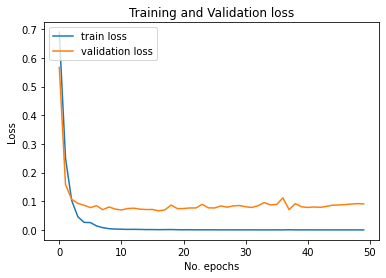

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.title('Training and Validation loss')
plt.ylabel('Loss')
plt.xlabel('No. epochs')
plt.legend(loc="upper left")
plt.show()

In [ ]:
df_new = leg_email_df.copy()
df_new

Message_Content  ... Phish
0                                ok til let know stress  ...     0
1     delete lara george rachel paul theresa helen s...  ...     0
2     deadline hollywood posted urgent news phillips...  ...     0
3     automatically unsubscribed list please email u...  ...     0
4     video remarks trump amp clinton played latino ...  ...     0
...                                                 ...  ...   ...
999   dear national city business client national ci...  ...     1
1000  dear ebay member super sales streak since done...  ...     1
1001  paypal yiv yiv td font family verdana arial he...  ...     1
1002  body td font family verdana arial helvetica sa...  ...     1
1003  paypal obmessage dummy z body z td font family...  ...     1

[1004 rows x 4 columns]

In [ ]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['acc']
val_acc = hist.history['val_acc']

def calc_precentage(list):
  sum=0
  for val in list:
    sum+=val
  ans = sum/len(list)

  return ans

print("train_loss is: ", calc_precentage(train_loss))

print("val_loss is: ", calc_precentage(val_loss))

print("train_acc is: ", calc_precentage(train_acc))

print("val_acc is: ", calc_precentage(val_acc))


train_loss is:  0.023811749701417285
val_loss is:  0.09310036078095436
train_acc is:  0.9907202208042145
val_acc is:  0.9671823263168335


In [ ]:
model.save('first_model.h5')


In [ ]:
from keras.models import load_model
model = load_model('first_model.h5')

In [ ]:
#testing on a real data from phish directory
#message number 502, 503


#def readPhishFile(path):
#    #using only this method right now
#    print("path is: ", path)
#    files = glob.glob(os.path.join(path, '502.txt'))
       
#    for filepath in files:   
#        with open(filepath ,'r') as _file:
#            lines = _file.readlines()
#            _file.seek(0)
#            content_test1 = get_content_test(_file)
            
#            _file.close()
#    return content_test1

#def get_content_test(file):# MIME style Content Exctraction
#    data = file.read()
#    b = email.message_from_string(data)
#    body = ""

#    if b.is_multipart():
#        for part in b.walk():
#            ctype = part.get_content_type()
#            cdispo = str(part.get('Content-Disposition'))

            # skip any text/plain (txt) attachments
#            if ctype == 'text/plain' and 'attachment' not in cdispo:
#                body = part.get_payload(decode=True)  # decode
#                break
            # not multipart - i.e. plain text, no attachments, keeping fingers crossed
#    else:
#        body = b.get_payload(decode=True)
#    text = str(body)# content to string 
#    text = text[2:-1]
#    text = text.replace("\\n",'')
#    return text

#content_test1 = readPhishFile(path_phish)

#clean the text

#content_test1 = content_test1.lower()
#content_test1 = content_test1.replace("\n"," ")
#content_test1 = content_test1.replace("\\\+"," ")
#content_test1 = content_test1.replace("\t"," ")
#content_test1 = content_test1.replace("a0"," ")
#content_test1 = content_test1.replace("\\\\x"," ")
#content_test1 = content_test1.replace('x '," ")
#content_test1 = content_test1.replace("\\\\'t","'t ")
#content_test1 = content_test1.replace("\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t"," ")
#content_test1 = content_test1.replace("<<link>>","")
#content_test1 = content_test1.rstrip('\d+')
#content_test1 = content_test1.replace('\d+', '')
#remove digits from message content


#content_test1 = ''.join([i for i in content_test1 if not i.isdigit()])

#print("content document: ", content_test1)



#from nltk import word_tokenize

#print("phish file content before is: ", content_test1)
#content_test1 = str(removeStopWords(content_test1))
#content_test1 = remove_punct(content_test1)
#content_test1 = re.sub(' +', ' ', content_test1)
#content_test1.split()
#print("After: ",content_test1)
#print(0)

#test_tokens = nltk.word_tokenize(content_test1)


#print("phish file content to tokens is: \n", test_tokens)


path is:  /content/gdrive/MyDrive/פרויקט גמר- amit dvir/rakesh DS/IWSPA2.0_Training_Full_Header/phish
content document:  paypal#obmessage .dummy {}#z body, #z  td {font-family: verdana,arial,helvetica,sans-serif;font-size:px;color: #;}information about your account:dear customer paypal:attention! your paypal account has been limited!as part of our security measures, we regularly check the activity of the screen paypal.we requested information from you for the following reason:our system has detected unusual charges to a domain.com card linked to your paypal account.reference number: pp---this is the last reminder to log into paypal, as soon as possible. once you connect. paypal will provide measures to restore access to your account.once connected, follow the steps to activate your account. we appreciate your understanding as we work to ensure the safety accountthank you for your attention to this question. please understand that this is a security measure intended to protect you and y

In [ ]:


#tokenizer.fit_on_texts(test_tokens)
#testing_sequences = tokenizer.texts_to_sequences(test_tokens)
#MAX_SEQUENCE_LENGTH = 256
#train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)
#prediction=model.predict(train_cnn_data)#--->>convert to integers and try testing the model prediction on this email


In [ ]:
#train_loss = hist.history['loss']
#val_loss = hist.history['val_loss']
#train_acc = hist.history['acc']
#val_acc = hist.history['val_acc']



#print("train_loss is: ", calc_precentage(train_loss))

#print("val_loss is: ", calc_precentage(val_loss))

#print("train_acc is: ", calc_precentage(train_acc))

#print("val_acc is: ", calc_precentage(val_acc))

train_loss is:  0.023811749701417285
val_loss is:  0.09310036078095436
train_acc is:  0.9907202208042145
val_acc is:  0.9671823263168335
